# MANOVA

Çok Değişkenli Varyans Analizi (MANOVA), birden fazla bağımlı değişkenin bulunduğu durumlarda kullanılır. Bağımsız gruplar için tek Faktörlü ANOVA'dan farkı, birden fazla bağımlı değişkenin eşzamanlı incelenmesine olanak sağlamasıdır. 

## MANOVA’da geometrik yaklaşım

* İki sonuçlu bir bağımsız değişken ile bir bağımlı değişken 

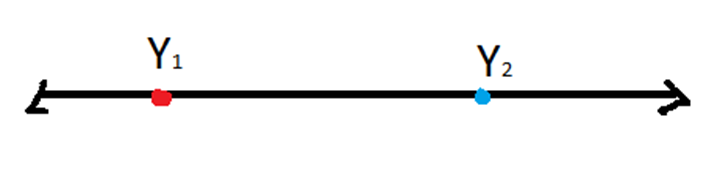

Bu iki merkez arasındaki uzaklık hesaplanarak fark sorgulanır. 

* İki sonuçlu bir bağımsız değişken iki bağımlı değişken

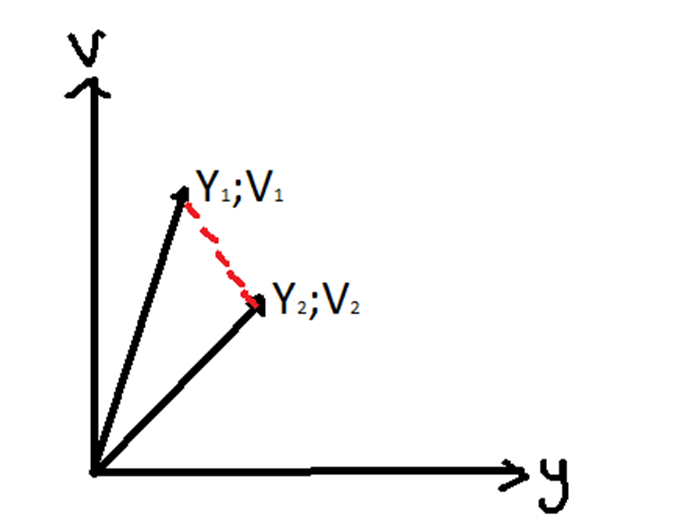
 
* Birden çok bağımsız değişken ve p-Sayıda Bağımlı Değişken

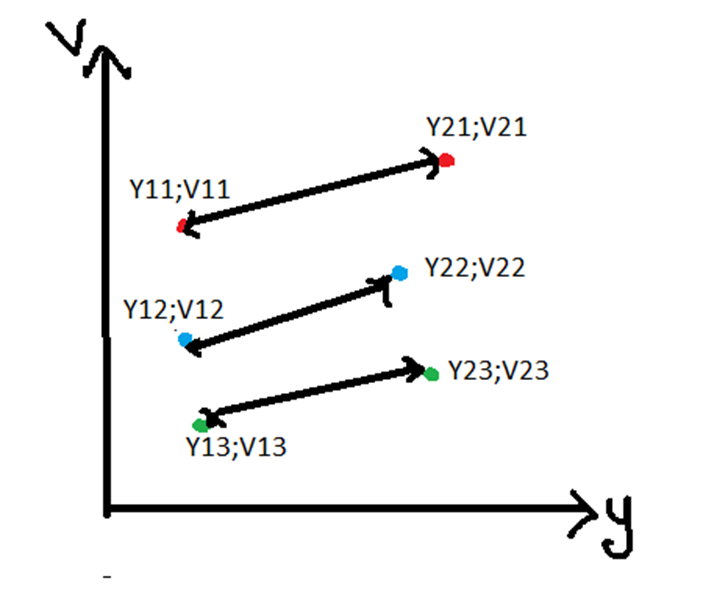


## Tek Yönlü Manova: 1’den fazla bağımlı – 1 bağımsız değişken

Tek yönlü MANOVA’da yokluk hipotezi grup ortalamalarının birbirine eşit olduğunu varsayar.

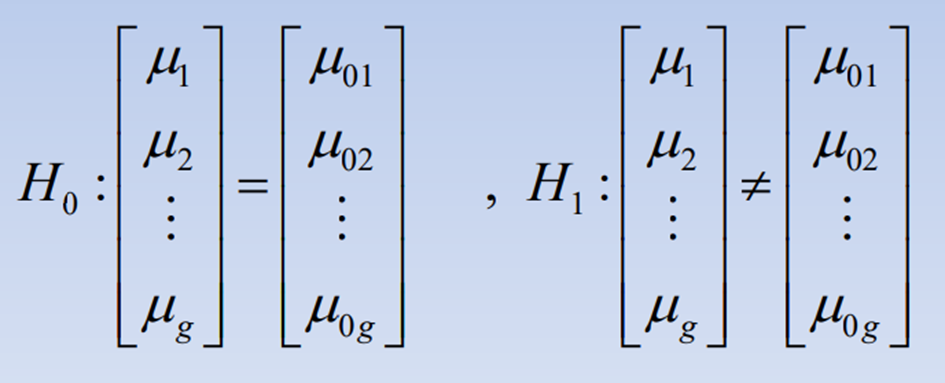

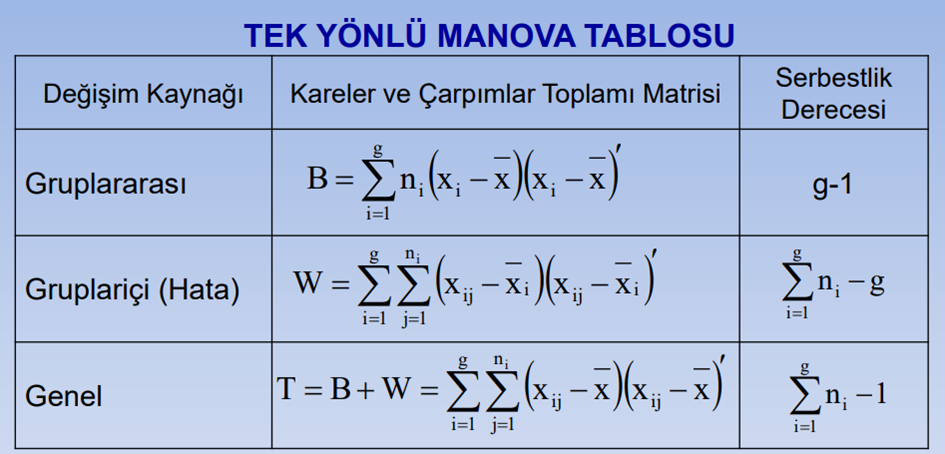

* B (Gruplar Arası Kareler ve Çarpımlar Toplamı Matrisi): Grup ortalama vektörünün genel ortalama vektöründen farkı olup gruplar arasındaki etki farklığını gösterir. 
* W (Hata Kareler ve Çarpımlar Toplamı Matrisi): Her gruptaki gözlemler vektöründeki elemanların kendi grup ortalama vektöründen ayrılışı olup hataları belirtmektedir. 
* T (Genel Kareler ve Çarpımlar Toplamı Matrisi)


# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats  
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.stats.multicomp import MultiComparison
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import multivariate_normality
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Setini Düzenleme

In [13]:
df_all = pd.read_csv("aug_train.csv")
df_all = df_all.dropna()

In [14]:
def edu_level_rank(row):
    if row['education_level'] == 'Primary School':
        return 0
    elif row['education_level'] == 'High School':
        return 1
    elif row['education_level'] == 'Graduate':
        return 2
    elif row['education_level'] == 'Masters':
        return 3
    elif row['education_level'] == 'Phd':
        return 4
    else :
        pass

def exp_rank(row):
    if row['experience'] == '<1':
        return 0
    elif row['experience'] == '1':
        return 1
    elif row['experience'] == '2':
        return 2
    elif row['experience'] == '3':
        return 3
    elif row['experience'] == '4':
        return 4
    elif row['experience'] == '5':
        return 5
    elif row['experience'] == '6':
        return 6
    elif row['experience'] == '7':
        return 7
    elif row['experience'] == '8':
        return 8
    elif row['experience'] == '9':
        return 9
    elif row['experience'] == '10':
        return 10
    elif row['experience'] == '11':
        return 11
    elif row['experience'] == '12':
        return 12
    elif row['experience'] == '13':
        return 13
    elif row['experience'] == '14':
        return 14
    elif row['experience'] == '15':
        return 15
    elif row['experience'] == '16':
        return 16
    elif row['experience'] == '17':
        return 17
    elif row['experience'] == '18':
        return 18
    elif row['experience'] == '19':
        return 19
    elif row['experience'] == '20':
        return 20
    elif row['experience'] == '>20':
        return 21
    else :
        pass
    
def major_disc(row):
    if row['major_discipline'] == 'STEM':
        return 1
    elif row['major_discipline'] == 'Humanities':
        return 2
    elif row['major_discipline'] == 'Other':
        return 3
    elif row['major_discipline'] == 'Business Degree':
        return 4
    elif row['major_discipline'] == 'Arts':
        return 5
    elif row['major_discipline'] == 'No Major':
        return 6
    else :
        pass
    
df_all['major_discipline'] = df_all.apply (lambda row: major_disc(row), axis=1)
df_all['education_level'] = df_all.apply (lambda row: edu_level_rank(row), axis=1)
df_all['experience'] = df_all.apply (lambda row: exp_rank(row), axis=1)

In [5]:
df_all.drop(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'company_size', 'company_type',
       'last_new_job', 'target'],axis = 1, inplace =True)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   education_level   8955 non-null   int64
 1   major_discipline  8955 non-null   int64
 2   experience        8955 non-null   int64
 3   training_hours    8955 non-null   int64
dtypes: int64(4)
memory usage: 349.8 KB


In [7]:
df_all.head()

,education_level,major_discipline,experience,training_hours
1,2,1,15,47
4,3,1,21,8
7,2,1,13,18
8,2,1,7,46
11,2,1,5,108


# Amaç: Eğitim Seviyesine göre tecrübe ve training süreleri değişiyor mu?

## Tanımsal İstatistikler

In [40]:
df_tm=df_all.drop(['major_discipline'], axis=1)
df_tm.describe().T

,count,mean,std,min,25%,50%,75%,max
education_level,8955.0,2.330207,0.527190,2.0,2.0,2.0,3.0,4.0
experience,8955.0,11.635623,6.545796,0.0,6.0,10.0,18.0,21.0
training_hours,8955.0,65.074930,60.235087,1.0,23.0,47.0,88.0,336.0


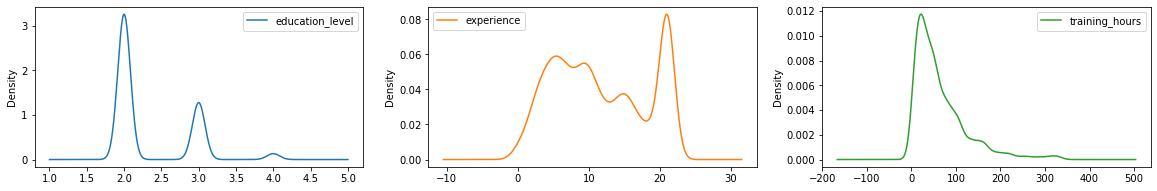

In [41]:
df_tm.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20, 10))
plt.show()

,Count
education_level,
2,6252
3,2449
4,254


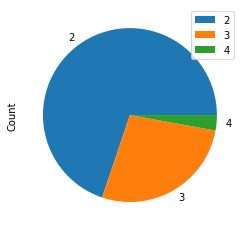

In [42]:
dis = pd.DataFrame(df_all[['education_level']].value_counts())
dis = dis.reset_index().set_index('education_level')
dis.columns = ['Count']
_ = dis.plot.pie(y='Count')
dis

# Varsayım 1: Verilerin Normal Dağılıma Uyması
##### Ho: Verilerin dağılımı ile Normal Dağılım arasında fark yoktur.(Veriler normal dağılıma uygundur.)
##### Ha: Verilerin dağılımı ile Normal Dağılım arasında fark vardır.(Veriler normal dağılıma uygun değildir.)

In [11]:
multivariate_normality(df_tm, alpha=.05)

HZResults(hz=4662.561633711091, pval=0.0, normal=False)

p=0.00 olması sebebiyle H0 red, %95 güvenilirlikle veriler normal dağılıma uygun değildir.

# Varsayım 2: Kovaryans Eşitliği

##### Ho: Kovaryans matrisleri arasında fark yoktur. (eşittir)
##### Ha: Kovaryans matrisleri arasında fark vardır. (eşit değildir)

In [12]:
pg.box_m(df_tm, dvs=["training_hours", "experience"], group=("education_level"), alpha=.05)

,Chi2,df,pval,equal_cov
box,10.983283,6.0,0.088894,True


p değeri = 0.08 olduğundan kovaryans matrisleri eşittir.

# Varsayım 3: Gruplararası Korelasyon Eşitliği

In [43]:
df_edu2 = df_tm[(df_tm.education_level == 2)]
df_edu3 = df_tm[(df_tm.education_level == 3)]
df_edu4= df_tm[(df_tm.education_level == 4)]

<AxesSubplot:>

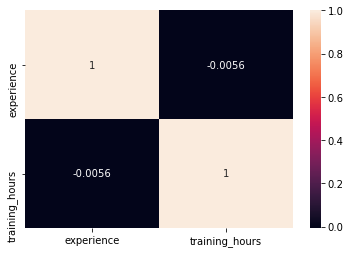

In [66]:
sns.heatmap(df_edu2.drop(["education_level"], axis=1).corr(), annot=True)

<AxesSubplot:>

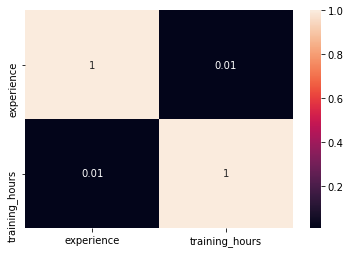

In [65]:
sns.heatmap(df_edu3.drop(["education_level"], axis=1).corr(), annot=True)

<AxesSubplot:>

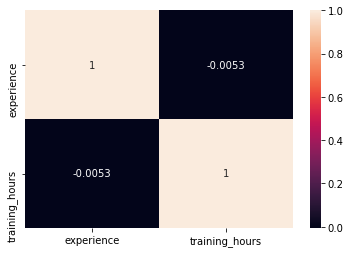

In [62]:
sns.heatmap(df_edu4.drop(["education_level"], axis=1).corr(), annot=True)

## Varsayım 4: Varyansların Homojenliği
##### Ho: Varyanslar arasında fark yoktur.(Varyanslar homojendir.)
##### Ha: Varyanslar fark vardır.(Varyanslar homojen değildir.)

In [26]:
stats.levene(df_tm['experience'][df_tm['education_level'] == 2],
             df_tm['experience'][df_tm['education_level'] == 3],
             df_tm['experience'][df_tm['education_level'] == 4])

LeveneResult(statistic=1.9521532397854722, pvalue=0.14202848264032472)

In [67]:
stats.levene(df_tm['training_hours'][df_tm['education_level'] == 2],
             df_tm['training_hours'][df_tm['education_level'] == 3],
             df_tm['training_hours'][df_tm['education_level'] == 4])

LeveneResult(statistic=2.135901474259948, pvalue=0.11819824508138506)

p1=0.14 ve p2=0.11 olması sebebiyle H0 reddedilemez. %95 güvenilirlikle varyanslar homojendir.

# MANOVA
##### Ho: Eğitim seviyesine göre tecrübe ve training saatleri arasında fark yoktur.
##### Ha: Eğitim seviyesine göre tecrübe ve training saatleri arasında fark vardır.

In [13]:
maov = MANOVA.from_formula('training_hours + experience + \
                            training_hours + experience  ~ education_level', data=df_tm)

In [14]:
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9111 2.0000 8952.0000 436.8658 0.0000
         Pillai's trace 0.0889 2.0000 8952.0000 436.8658 0.0000
 Hotelling-Lawley trace 0.0976 2.0000 8952.0000 436.8658 0.0000
    Roy's greatest root 0.0976 2.0000 8952.0000 436.8658 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
    education_level     Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9730 2.0000 8952.0000 124.1549 0.0000
         Pillai's trace 0.0270 2.0000 8952.0000 124.1549 0.

p=0.00 olması sebebiyle H0 reddedilir. %95 güvenilirlikle grup ortalamaları arasında fark vardır.

# Diskriminant Analizi ile Post-Hoc

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
X = df_tm[["training_hours", "experience"]]
y = df_tm["education_level"]
post_hoc = lda().fit(X=X, y=y)

In [17]:
post_hoc.means_

array([[65.65339091, 11.72200896],
       [63.29440588, 13.76561862],
       [68.00393701, 18.33858268]])

In [35]:
ort = ({"Graduate ":post_hoc.means_[0],     
       "Masters' ":post_hoc.means_[1],
       "PHD      ":post_hoc.means_[2]})
print(str(ort).replace('),',',\n'))

{'Graduate ': array([65.65339091, 11.72200896],
 "Masters' ": array([63.29440588, 13.76561862],
 'PHD      ': array([68.00393701, 18.33858268])}


In [36]:
# açıklanan varyans
post_hoc.explained_variance_ratio_

array([0.98868992, 0.01131008])

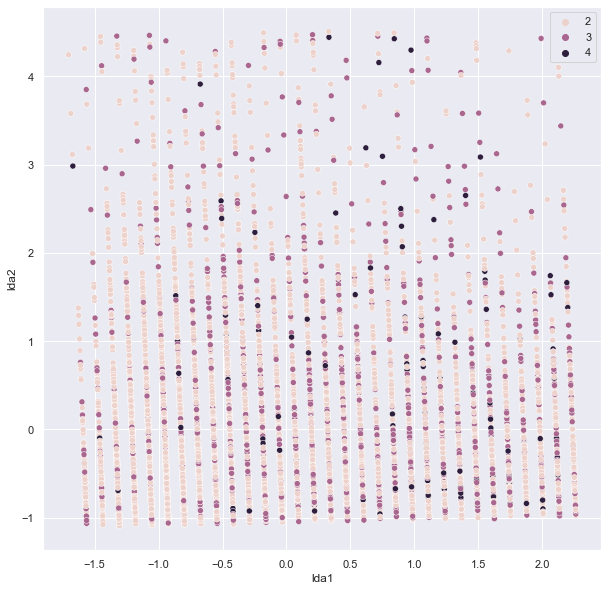

In [40]:
# plot 
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_new["education_level"] = df_tm["education_level"]
sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=df_tm.education_level.tolist())
plt.show()

# Tek Değişkenli Post Hoc

# Tukey ile Çoklu Karşılaştırma

## Eğitim seviyesine göre tecrübe ortalamaları farklılaşıyor mu?

In [31]:
kars1 = MultiComparison(df_tm["experience"], df_tm["education_level"])    
kars1_sonuc = kars1.tukeyhsd()
print(kars1_sonuc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     2      3   2.0436 0.001 1.6056 2.4816   True
     2      4   6.6166 0.001 5.4405 7.7927   True
     3      4    4.573 0.001 3.3617 5.7842   True
-------------------------------------------------


Eğitim seviyesine göre tecrübe ortalamalarının farklılaşmasının anlamlı olduğu görülmektedir.

Lisans mezunlarının tecrübesi; yüksek lisans mezunlarına göre 2 yıl daha fazla iken Doktora mezunlarına göre 6.5 yıl daha fazladır. 
Yüksek lisans mezunlarının ise doktora mezunlarına göre tecrübeleri 4.5 yıl daha fazladır.

## Eğitim seviyesine göre training süre ortalamaları farklılaşıyor mu?

In [30]:
kars2 = MultiComparison(df_tm["training_hours"], df_tm["education_level"])    
kars2_sonuc = kars2.tukeyhsd()
print(kars2_sonuc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     2      3   -2.359  0.228 -5.7247  1.0067  False
     2      4   2.3505 0.7948 -6.6865 11.3875  False
     3      4   4.7095 0.4633 -4.5974 14.0164  False
----------------------------------------------------


Eğitim seviyesine göre training süresi ortalamalarının farklılaşmasının anlamlı olmadığı görülmektedir.

# Çift Yönlü Manova

In [76]:
df_cm= df_all

In [77]:
maov = MANOVA.from_formula('training_hours + experience + \
                            training_hours + experience  ~ education_level+major_discipline', data=df_cm)

In [78]:
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9063 2.0000 8951.0000 462.4488 0.0000
         Pillai's trace 0.0937 2.0000 8951.0000 462.4488 0.0000
 Hotelling-Lawley trace 0.1033 2.0000 8951.0000 462.4488 0.0000
    Roy's greatest root 0.1033 2.0000 8951.0000 462.4488 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
    education_level     Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9708 2.0000 8951.0000 134.8167 0.0000
         Pillai's trace 0.0292 2.0000 8951.0000 134.8167 0.

%95 güvenilirlikle eğitim seviyesine göre grup ortalamaları arasında fark var iken ana disipline göre grup ortalamaları arasında fark yoktur.